<a href="https://colab.research.google.com/github/bayusamudra5502/Matdis-Steganografi/blob/main/src/notebook/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penerapan Pembangkit Bilangan Acak dalam Steganografi

**Oleh Bayu Samudra**

Notebook ini merupakan notebook yang digunakan dalam pembuatan makalah. Pada notebook ini, kita akan mencoba menyelami dunia steganografi. Steganografi adalah salah satu teknik menyembunyikan data dalam suatu media. Hal ini cukup berbeda bila dibandingkan dengan kriptografi. Pada kali ini, kita akan mencoba melakukan steganografi pada gambar.

## Import Library
Pada notebook ini, kita akan menggunakan tiga buah library, yaitu numpy, seaborn, dan OpenCV.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

import src.notebook.util as util

Berikut ini adalah konfigurasi untuk percobaan ini

In [2]:
IMG_INPUT_DIR = "./src/img"
IMG_OUTPUT_DIR = "./src/img"
OUTPUT_PREFIX = "SO_"

## Citra Digital

Sebuah Citra digital merupakan matriks dari sebuah komponen yang disebut pixel. Pixel memiliki ukuran beragam tergantung jumlah bit. Pada bagian ini, kita akan coba mengulas mengenai citra digital terlebih dahulu.

### Import Gambar

Mari pertama-tama kita import gambarnya.

In [3]:
cloud_original = cv2.imread(f"{IMG_INPUT_DIR}/citra.jpg")

Kita akan coba mengembalikan gambar RGB (24-bit pixel)

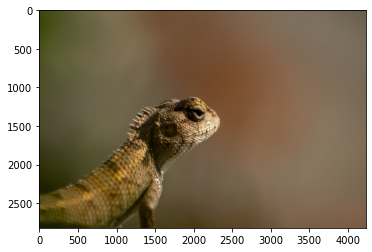

In [4]:
# Membalikan order dari array 
cloud_rgb = cv2.cvtColor(cloud_original, cv2.COLOR_BGR2RGB)
plt.imshow(cloud_rgb)

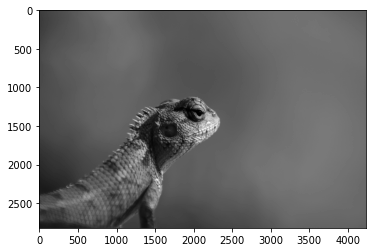

In [5]:
cloud_grey = cv2.cvtColor(cloud_original, cv2.COLOR_BGR2GRAY)
plt.imshow(cloud_grey, cmap="gray")

In [6]:
cloud_grey

array([[61, 62, 62, ..., 93, 93, 91],
       [61, 61, 62, ..., 93, 94, 94],
       [60, 61, 61, ..., 94, 95, 94],
       ...,
       [26, 25, 25, ..., 96, 97, 95],
       [26, 26, 25, ..., 97, 98, 96],
       [27, 26, 26, ..., 97, 98, 98]], dtype=uint8)

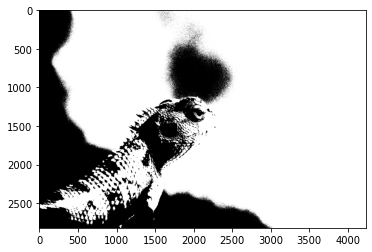

In [7]:
cloud_bin = cv2.threshold(cloud_grey, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(cloud_bin, cmap="gray")

## Melakukan Steganografi

Kita akan mencoba melakukan steganografi

### Penyisipan Pesan

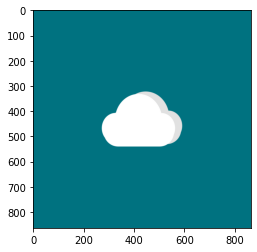

In [8]:
cover1 = cv2.imread(f"{IMG_INPUT_DIR}/LogoBayuGede.png")
cover1_rgb = cv2.cvtColor(cover1, cv2.COLOR_BGR2RGB)
plt.imshow(cover1_rgb)

In [9]:
cover1.shape

(863, 863, 3)

In [10]:
cover_size = 863 * 863 * 3

In [11]:
a = util.get_lowest_multiplier(cover_size)
b = util.get_b(cover_size)

In [12]:
[a,b]

[2590, 1837928]

In [13]:
arr1d = util.matrixto1d(cover1_rgb)
arr1d
randomizer = util.LCG(a,b,cover_size, seed=1)
copyRandom = util.LCG(a,b,cover_size, seed=1)
result, bits = util.insert_message(randomizer, arr1d, "Halo, Dunia", lsb_number=2)
steg_obj = result.reshape((863,863,3))
bits

96

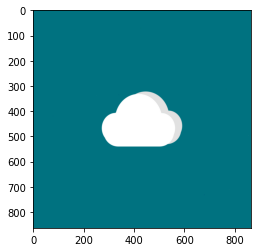

In [14]:
plt.imshow(steg_obj)

In [15]:
strResult, bits = util.extract_message(randomizer, result, lsb_number=2)

72 2 
18504 4 
4737096 6 
1212696648 8 


ValueError: ignored

In [ ]:
bits